In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
# Load the CSV file
file_path = 'business_analyst_jobs.csv'
data = pd.read_csv(file_path)

# Clean the Salary column to extract minimum and maximum values
data['Min_Salary'] = data['Salary'].apply(lambda x: float(x.split('-')[0].replace('$', '').replace(',', '').strip()) if pd.notnull(x) else np.nan)
data['Max_Salary'] = data['Salary'].apply(lambda x: float(x.split('-')[1].replace('$', '').replace(',', '').strip()) if '-' in x else np.nan)
data['Avg_Salary'] = (data['Min_Salary'] + data['Max_Salary']) / 2

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for the salary range by experience
data_cleaned = remove_outliers(data, 'Avg_Salary')

# Extract city from the 'Location' column and handle 'Remote' entries
data_cleaned['City'] = data_cleaned['Location'].apply(lambda x: x.split(',')[0] if ',' in x else 'Remote')



<ipython-input-2-cfedac0cd51b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['City'] = data_cleaned['Location'].apply(lambda x: x.split(',')[0] if ',' in x else 'Remote')


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


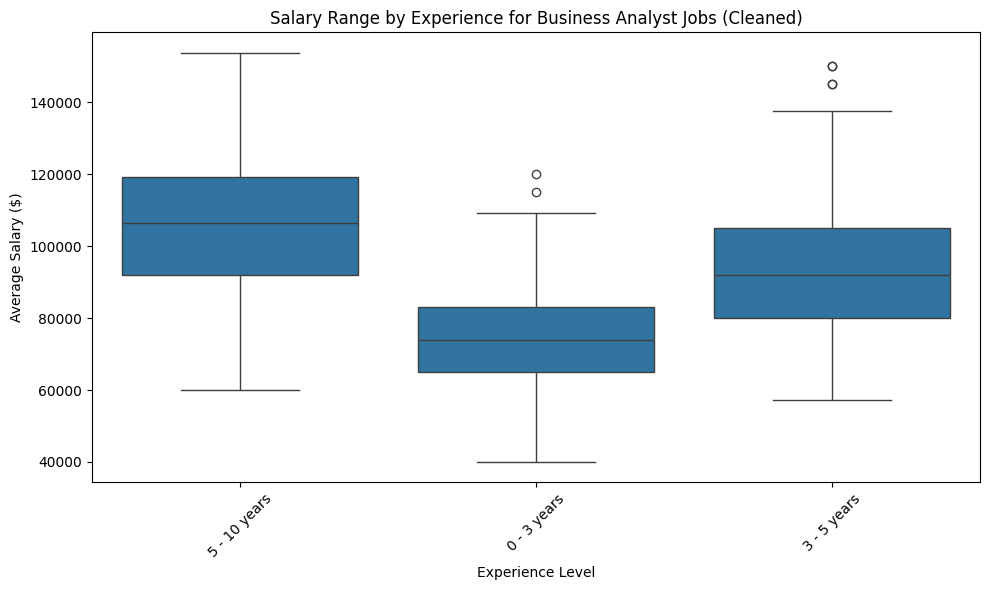

In [3]:
# 1. Plot salary range by experience without outliers
plt.figure(figsize=(10,6))
sns.boxplot(x='Experience', y='Avg_Salary', data=data_cleaned)
plt.title("Salary Range by Experience for Business Analyst Jobs (Cleaned)")
plt.xticks(rotation=45)
plt.xlabel("Experience Level")
plt.ylabel("Average Salary ($)")
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


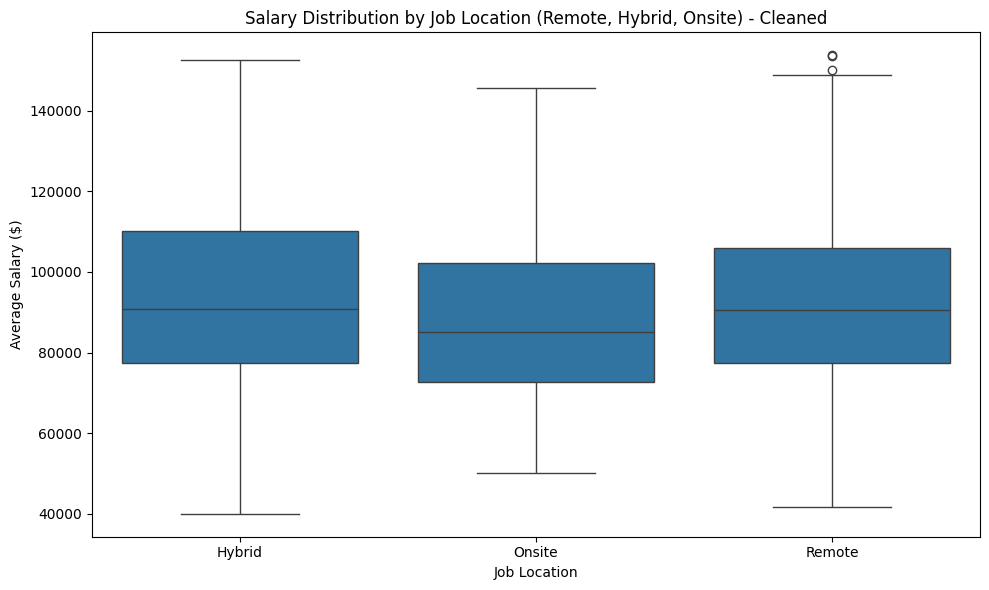

In [4]:
# 2. Salary distribution by job location without outliers
plt.figure(figsize=(10,6))
sns.boxplot(x='Workplace', y='Avg_Salary', data=data_cleaned)
plt.title("Salary Distribution by Job Location (Remote, Hybrid, Onsite) - Cleaned")
plt.xlabel("Job Location")
plt.ylabel("Average Salary ($)")
plt.tight_layout()
plt.show()



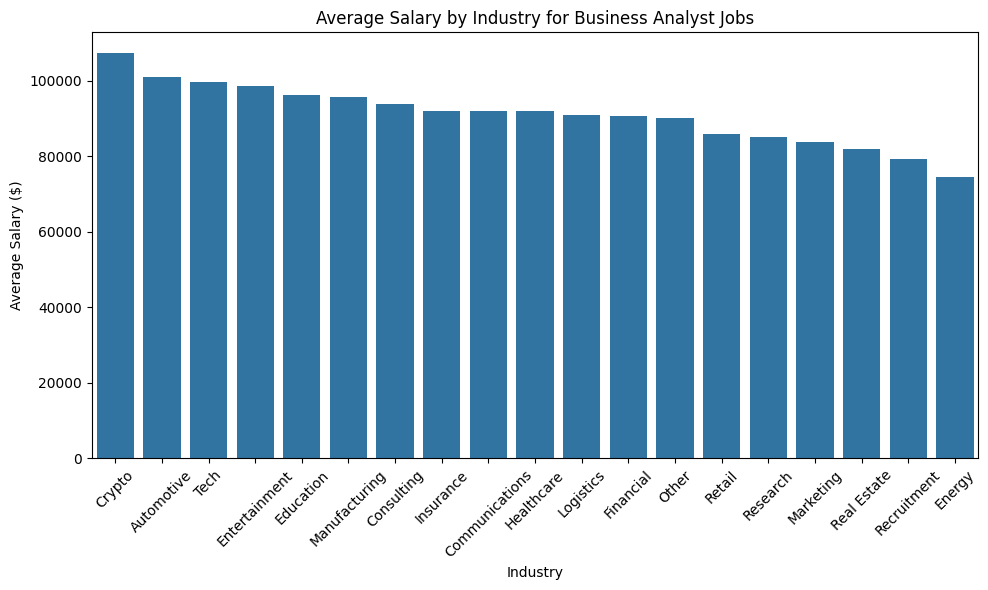

In [5]:
# 3. Average Salary by Industry
plt.figure(figsize=(10,6))
industry_salary = data_cleaned.groupby('Industry')['Avg_Salary'].mean().sort_values(ascending=False)
sns.barplot(x=industry_salary.index, y=industry_salary.values)
plt.title("Average Salary by Industry for Business Analyst Jobs")
plt.xticks(rotation=45)
plt.xlabel("Industry")
plt.ylabel("Average Salary ($)")
plt.tight_layout()
plt.show()



<ipython-input-6-324a49db2f7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Published Date'] = pd.to_datetime(data_cleaned['Published Date'], errors='coerce')
<ipython-input-6-324a49db2f7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Published_Month'] = data_cleaned['Published Date'].dt.month_name()


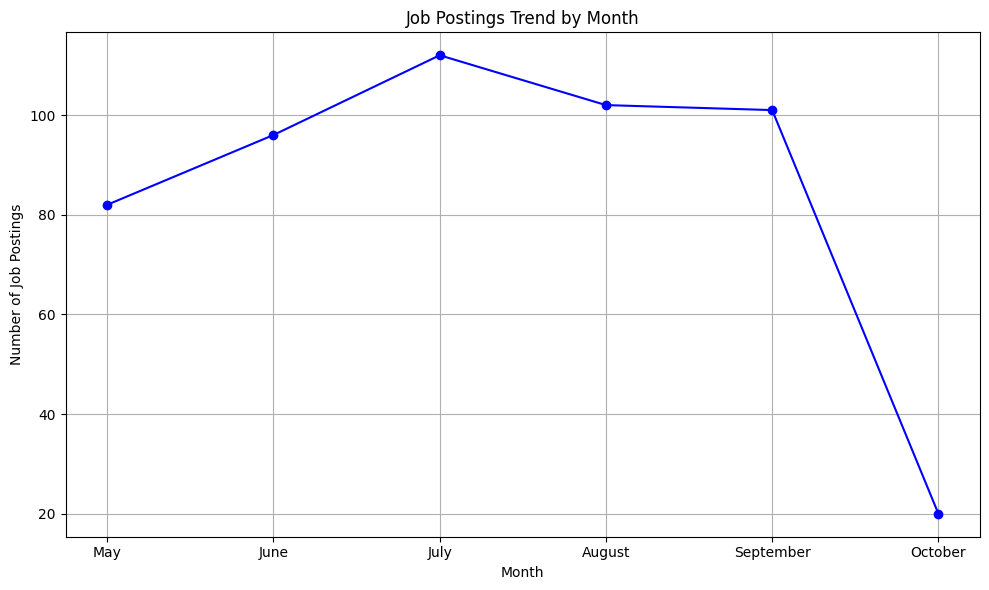

In [6]:
# 4. Job Postings Trend by Month (Line Chart)
data_cleaned['Published Date'] = pd.to_datetime(data_cleaned['Published Date'], errors='coerce')
data_cleaned['Published_Month'] = data_cleaned['Published Date'].dt.month_name()

plt.figure(figsize=(10,6))
monthly_postings = data_cleaned.groupby('Published_Month').size().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December'])

# Plotting a line chart for job postings trend
monthly_postings.plot(kind='line', marker='o', color='b')
plt.title("Job Postings Trend by Month")
plt.xlabel("Month")
plt.ylabel("Number of Job Postings")
plt.grid(True)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


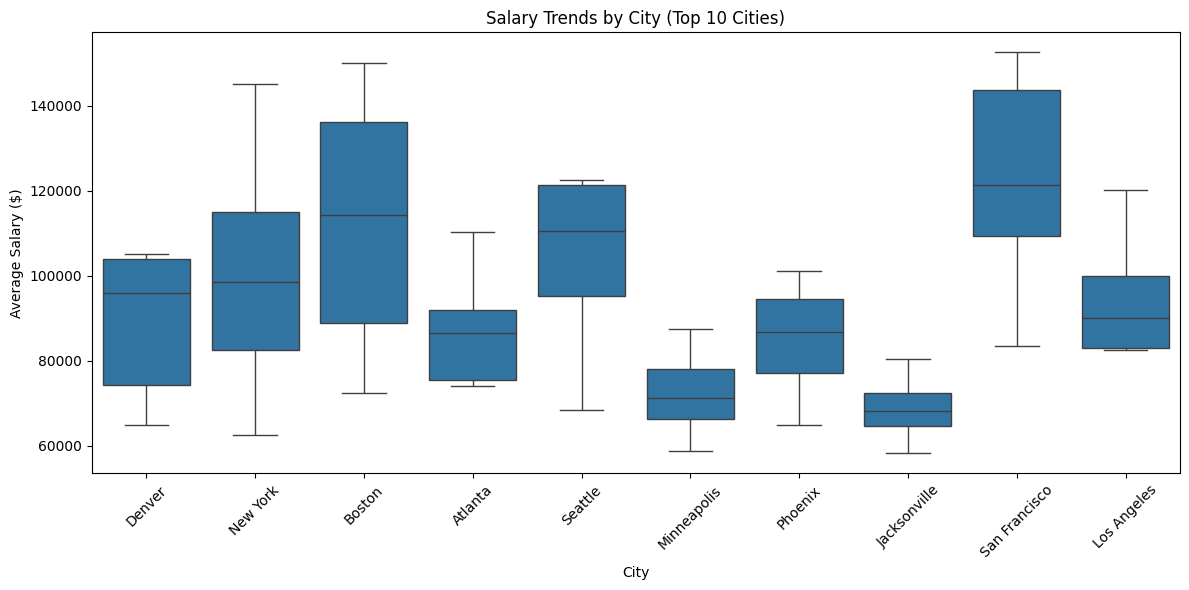

In [7]:
# 5. Salary Trends by City (Top 10 Cities)
# Remove "Remote" entries for city-specific analysis
city_salary_data = data_cleaned[data_cleaned['City'] != 'Remote']

# Count the number of jobs in each city and get the top 10 cities
top_cities = city_salary_data['City'].value_counts().head(10).index
top_cities_data = city_salary_data[city_salary_data['City'].isin(top_cities)]

# Create a boxplot to show the salary trends in the top 10 cities
plt.figure(figsize=(12,6))
sns.boxplot(x='City', y='Avg_Salary', data=top_cities_data)
plt.title("Salary Trends by City (Top 10 Cities)")
plt.xlabel("City")
plt.ylabel("Average Salary ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



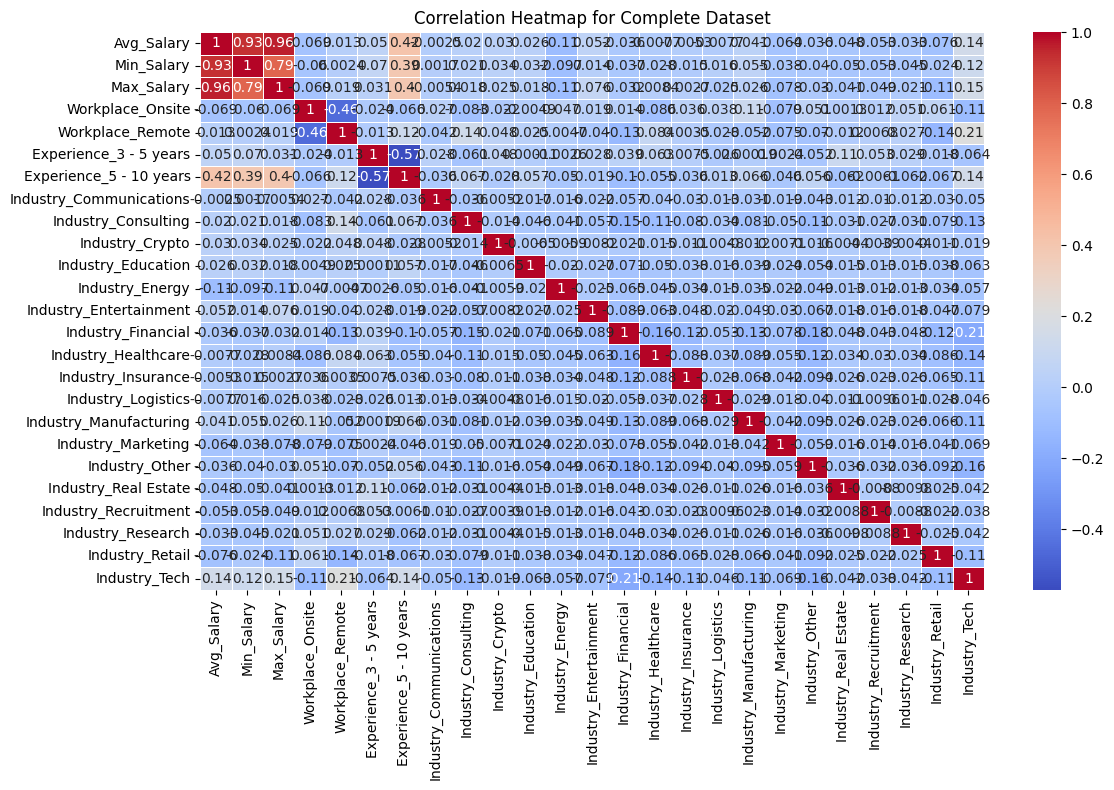

In [8]:
# 6. Correlation Heatmap for complete dataset
one_hot_encoded_data = pd.get_dummies(data_cleaned[['Workplace', 'Experience', 'Industry']], drop_first=True)
combined_data = pd.concat([data_cleaned[['Avg_Salary', 'Min_Salary', 'Max_Salary']], one_hot_encoded_data], axis=1)

plt.figure(figsize=(12,8))
sns.heatmap(combined_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for Complete Dataset")
plt.tight_layout()
plt.show()



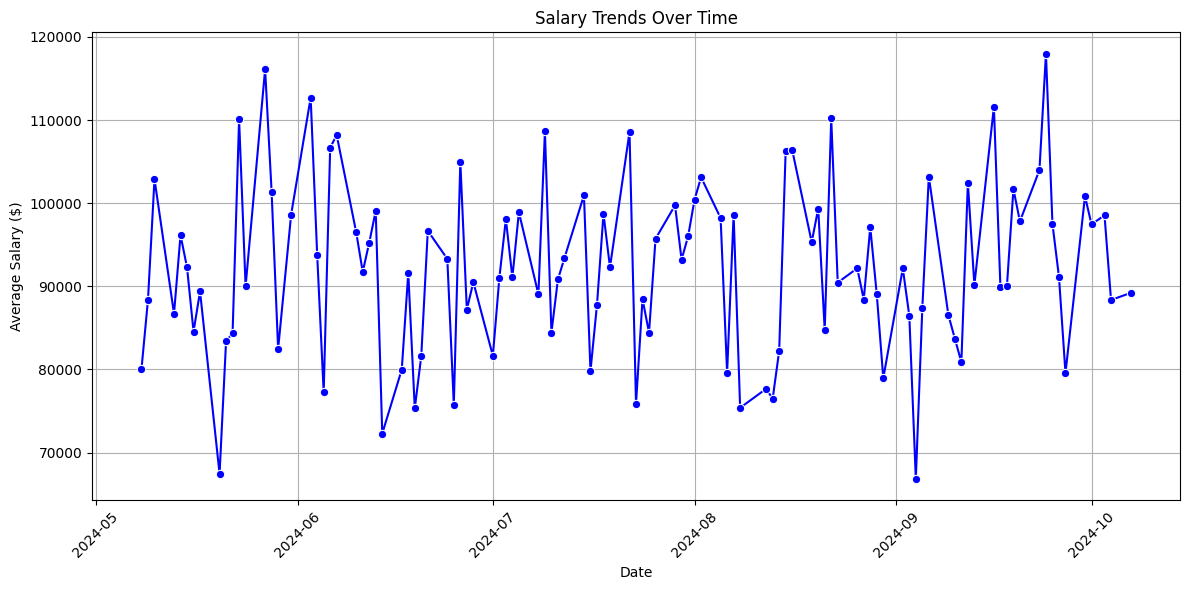

In [9]:
# 7. Salary Trends Over Time
salary_trend_data = data_cleaned.groupby('Published Date')['Avg_Salary'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Published Date', y='Avg_Salary', data=salary_trend_data, marker='o', color='b')
plt.title("Salary Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Average Salary ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



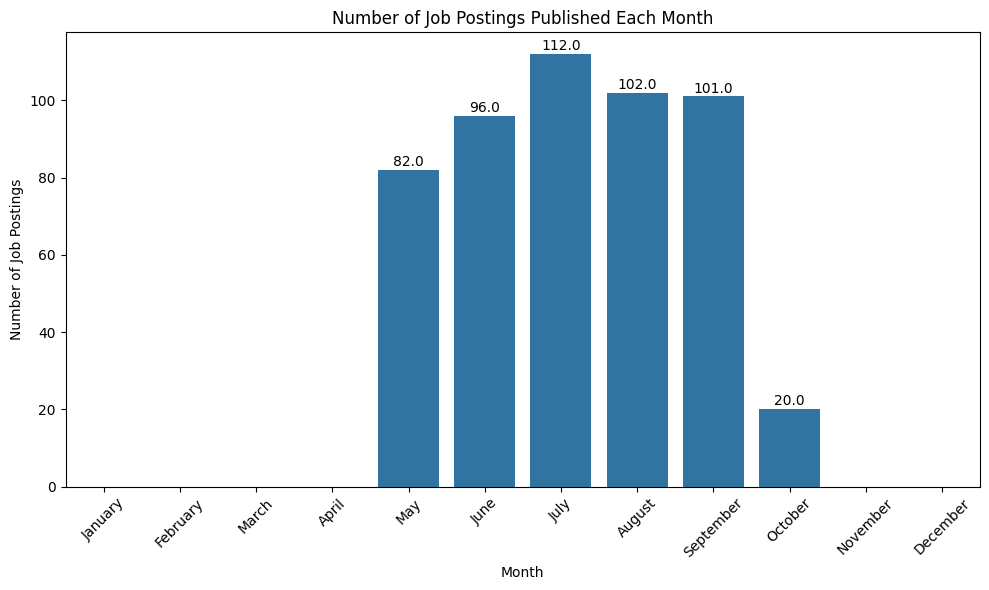

In [10]:
# 8. Create a bar chart showing the number of job postings published each month with numbers displayed on the bars and group the data by the 'Published_Month' column to count the number of job postings per month
monthly_job_postings = data_cleaned['Published_Month'].value_counts().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December'])

# Plotting a bar chart for job postings by month with numbers on top of each bar
plt.figure(figsize=(10,6))
ax = sns.barplot(x=monthly_job_postings.index, y=monthly_job_postings.values)
plt.title("Number of Job Postings Published Each Month")
plt.xlabel("Month")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)

# Add numbers on top of each bar
for index, value in enumerate(monthly_job_postings.values):
    ax.text(index, value + 1, str(value), ha='center')

plt.tight_layout()
plt.show()


Health Care Industry Related Graph's

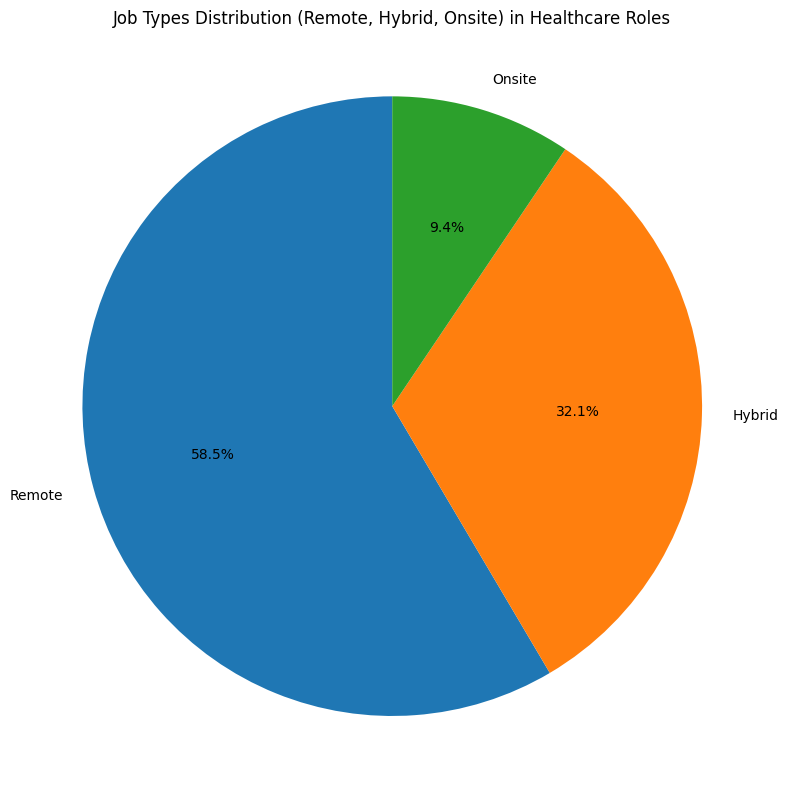

In [11]:
# 9. Pie chart for job types (Remote, Hybrid, Onsite) in healthcare roles
healthcare_data = data_cleaned[data_cleaned['Industry'] == 'Healthcare']
job_type_counts = healthcare_data['Workplace'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(job_type_counts, labels=job_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Job Types Distribution (Remote, Hybrid, Onsite) in Healthcare Roles")
plt.axis('equal')
plt.tight_layout()
plt.show()



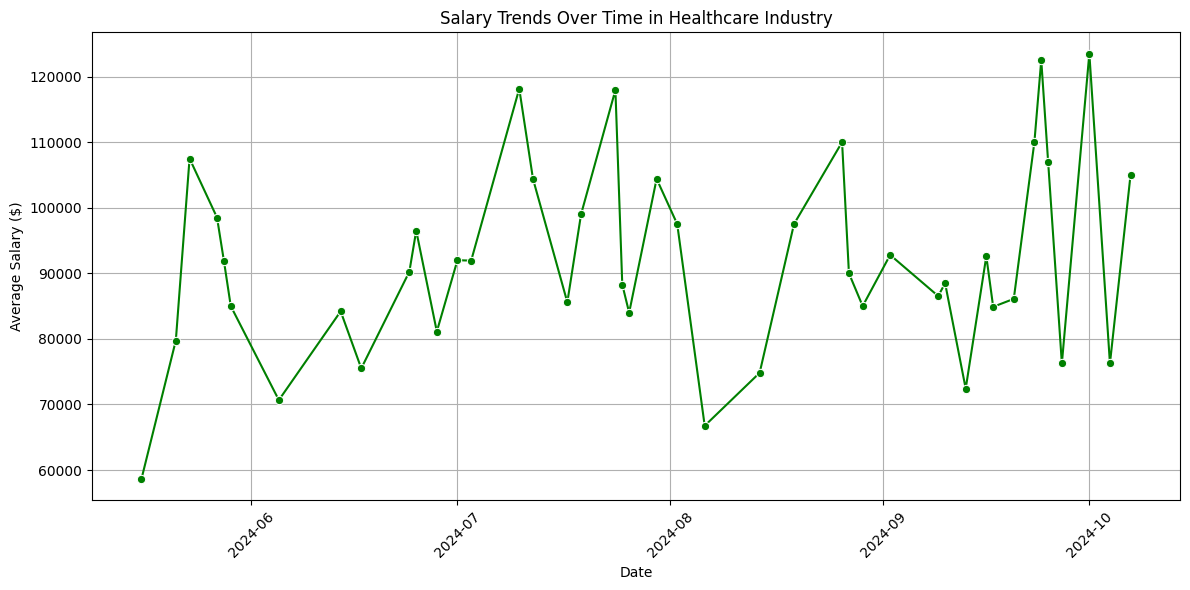

In [12]:
# 10. Salary Trends Over Time in Healthcare Industry
healthcare_salary_trend_by_date = healthcare_data.groupby('Published Date')['Avg_Salary'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Published Date', y='Avg_Salary', data=healthcare_salary_trend_by_date, marker='o', color='g')
plt.title("Salary Trends Over Time in Healthcare Industry")
plt.xlabel("Date")
plt.ylabel("Average Salary ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


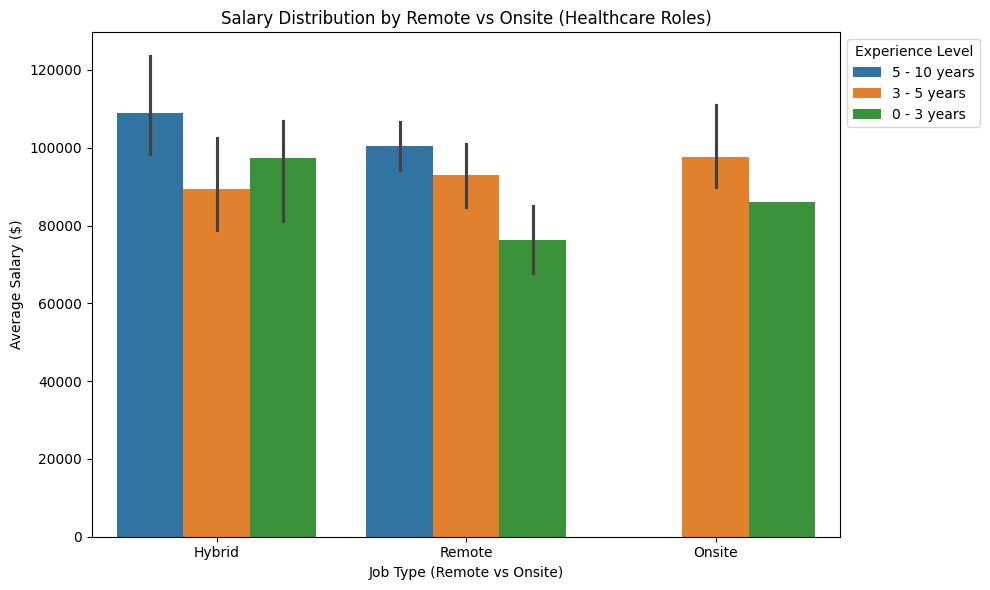

In [13]:
# 11. Bar graph for salary distribution by experience for remote vs onsite in healthcare roles
plt.figure(figsize=(10,6))
sns.barplot(x='Workplace', y='Avg_Salary', hue='Experience', data=healthcare_data)
plt.title("Salary Distribution by Remote vs Onsite (Healthcare Roles)")
plt.xlabel("Job Type (Remote vs Onsite)")
plt.ylabel("Average Salary ($)")
plt.legend(title="Experience Level", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
